In [183]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.enable_eager_execution()
# tf.disable_eager_execution()
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten,
    Conv2D,
    MaxPooling2D,
    AveragePooling2D
)

In [184]:
import pandas as pd
import numpy as np
import random as random
import pyarrow as pa 
import pyarrow.parquet as pq
from fastavro import writer, reader, parse_schema
import collections

In [185]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [186]:
from tensorflow.python.keras.optimizers import Adam, SGD

In [187]:
import sonnet as snt

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt

In [189]:
records = []
with open('okex_spot_ETH_BTC_60.avro', 'rb') as fo:
    for record in reader(fo):
        records.append(record)

In [190]:
data = pd.DataFrame(records)

In [191]:
df = data.copy()

In [192]:
df = (df.sort_values(by=['window_end']).set_index(['window_end'])[150:]).fillna(method="ffill")

In [193]:
a = df.head(n=20)

In [148]:
features = [
    'all_close_price', 
    'all_high_price', 
    'all_mean_price', 
    'all_low_price',
    'all_low_quantity',
    'all_mean_quantity',
    'all_vwap',
    'all_std_price',
    'sell_close_price', 
    'sell_high_price', 
    'sell_mean_price', 
    'sell_low_price',
    'sell_low_quantity',
    'sell_mean_quantity',
    'sell_vwap',
    'sell_std_price', 
    'buy_close_price', 
    'buy_high_price', 
    'buy_mean_price', 
    'buy_low_price',    
    'buy_low_quantity',
    'buy_mean_quantity',
    'buy_vwap',
    'buy_std_price',
    'ask_0_close_price', 
    'ask_0_high_price', 
    'ask_0_mean_price', 
    'ask_0_low_price',
    'ask_0_vwap',
    'ask_0_std_price',
    'bid_0_close_price', 
    'bid_0_high_price', 
    'bid_0_mean_price', 
    'bid_0_low_price',
    'bid_0_vwap',
    'bid_0_std_price',
    'ask_1_close_price', 
    'ask_1_high_price', 
    'ask_1_mean_price', 
    'ask_1_low_price',
    'ask_1_vwap',
    'ask_1_std_price',
    'bid_1_close_price', 
    'bid_1_high_price', 
    'bid_1_mean_price', 
    'bid_1_low_price',
    'bid_1_vwap',
    'bid_1_std_price',
    'ask_2_close_price', 
    'ask_2_high_price', 
    'ask_2_mean_price', 
    'ask_2_low_price',
    'ask_2_vwap',
    'ask_2_std_price',
    'bid_2_close_price', 
    'bid_2_high_price', 
    'bid_2_mean_price', 
    'bid_2_low_price',
    'bid_2_vwap',
    'bid_2_std_price'
]
len(features)

60

In [14]:
Batch = collections.namedtuple(
    'Batch',
    [
        'frames',
        'next_prices',
        'current_prices',
        'decay',
        'commission',
        'max_leverage',
        'size'
    ]
)

In [126]:
def make_batch(batch_size=5, offset=0, window_size=90):
    frames=[]
    next_prices=[]
    current_prices=[]
    
    for i in range(batch_size):
        x = (offset*batch_size)+i
        
        current_frame = df.iloc[x:x+window_size][features].values
        next_frame = df.iloc[x+1:x+window_size+1][features].values

        frames.append(next_frame-current_frame)
        
        next_prices.append(df.iloc[x+window_size+1][["all_close_price"]].values)
        current_prices.append(df.iloc[x+window_size][["all_close_price"]].values)

    return Batch(
        frames=tf.cast(frames, tf.float32),
        next_prices=tf.cast(next_prices, tf.float32),
        current_prices=tf.cast(current_prices, tf.float32),
        decay=3.47222222e-7,
        commission=0.0015,
        max_leverage=4,
        size=batch_size
    )

In [127]:
same_batch = make_batch(10)

In [129]:
action = agent(tf.expand_dims(same_batch.frames, axis=3))

In [160]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.00008)

In [182]:
-

0
tf.Tensor(3.3179924e-07, shape=(), dtype=float32)
tf.Tensor(0.99999005, shape=(), dtype=float32)
tf.Tensor([-0.00347096], shape=(1,), dtype=float32)
1
tf.Tensor(3.7352254e-07, shape=(), dtype=float32)
tf.Tensor(0.99997884, shape=(), dtype=float32)
tf.Tensor([-0.01036513], shape=(1,), dtype=float32)
2
tf.Tensor(3.437202e-07, shape=(), dtype=float32)
tf.Tensor(0.9999685, shape=(), dtype=float32)
tf.Tensor([-0.01205638], shape=(1,), dtype=float32)
3
tf.Tensor(3.2186514e-07, shape=(), dtype=float32)
tf.Tensor(0.9999589, shape=(), dtype=float32)
tf.Tensor([-0.03572703], shape=(1,), dtype=float32)
4
tf.Tensor(3.2981242e-07, shape=(), dtype=float32)
tf.Tensor(0.999949, shape=(), dtype=float32)
tf.Tensor([-0.01255219], shape=(1,), dtype=float32)
5
tf.Tensor(3.7550933e-07, shape=(), dtype=float32)
tf.Tensor(0.9999377, shape=(), dtype=float32)
tf.Tensor([0.02450024], shape=(1,), dtype=float32)
6
tf.Tensor(3.437202e-07, shape=(), dtype=float32)
tf.Tensor(0.9999274, shape=(), dtype=float32)
tf.T

35
tf.Tensor(3.4570706e-07, shape=(), dtype=float32)
tf.Tensor(0.99962103, shape=(), dtype=float32)
tf.Tensor([0.03972397], shape=(1,), dtype=float32)
36
tf.Tensor(4.1325913e-07, shape=(), dtype=float32)
tf.Tensor(0.99960864, shape=(), dtype=float32)
tf.Tensor([0.01118834], shape=(1,), dtype=float32)
37
tf.Tensor(3.6358838e-07, shape=(), dtype=float32)
tf.Tensor(0.9995977, shape=(), dtype=float32)
tf.Tensor([0.03665158], shape=(1,), dtype=float32)
38
tf.Tensor(3.7550936e-07, shape=(), dtype=float32)
tf.Tensor(0.99958646, shape=(), dtype=float32)
tf.Tensor([0.01455839], shape=(1,), dtype=float32)
39
tf.Tensor(3.000101e-07, shape=(), dtype=float32)
tf.Tensor(0.99957746, shape=(), dtype=float32)
tf.Tensor([0.03616185], shape=(1,), dtype=float32)
40
tf.Tensor(3.4769383e-07, shape=(), dtype=float32)
tf.Tensor(0.99956703, shape=(), dtype=float32)
tf.Tensor([-0.01499744], shape=(1,), dtype=float32)
41
tf.Tensor(3.1193105e-07, shape=(), dtype=float32)
tf.Tensor(0.9995577, shape=(), dtype=float

69
tf.Tensor(3.6557523e-07, shape=(), dtype=float32)
tf.Tensor(0.99926937, shape=(), dtype=float32)
tf.Tensor([-0.02526904], shape=(1,), dtype=float32)
70
tf.Tensor(3.3378606e-07, shape=(), dtype=float32)
tf.Tensor(0.99925935, shape=(), dtype=float32)
tf.Tensor([-0.01387677], shape=(1,), dtype=float32)
71
tf.Tensor(3.5961475e-07, shape=(), dtype=float32)
tf.Tensor(0.99924856, shape=(), dtype=float32)
tf.Tensor([0.02643017], shape=(1,), dtype=float32)
72
tf.Tensor(3.1987832e-07, shape=(), dtype=float32)
tf.Tensor(0.99923897, shape=(), dtype=float32)
tf.Tensor([-0.00425736], shape=(1,), dtype=float32)
73
tf.Tensor(4.0531168e-07, shape=(), dtype=float32)
tf.Tensor(0.9992268, shape=(), dtype=float32)
tf.Tensor([-0.01376881], shape=(1,), dtype=float32)
74
tf.Tensor(3.2583878e-07, shape=(), dtype=float32)
tf.Tensor(0.99921703, shape=(), dtype=float32)
tf.Tensor([0.00793169], shape=(1,), dtype=float32)
75
tf.Tensor(2.6424732e-07, shape=(), dtype=float32)
tf.Tensor(0.9992091, shape=(), dtype=f

103
tf.Tensor(3.5961483e-07, shape=(), dtype=float32)
tf.Tensor(0.998929, shape=(), dtype=float32)
tf.Tensor([0.04923519], shape=(1,), dtype=float32)
104
tf.Tensor(4.4703518e-07, shape=(), dtype=float32)
tf.Tensor(0.9989156, shape=(), dtype=float32)
tf.Tensor([0.05544273], shape=(1,), dtype=float32)
105
tf.Tensor(2.662342e-07, shape=(), dtype=float32)
tf.Tensor(0.9989076, shape=(), dtype=float32)
tf.Tensor([0.01999524], shape=(1,), dtype=float32)
106
tf.Tensor(3.6358844e-07, shape=(), dtype=float32)
tf.Tensor(0.9988967, shape=(), dtype=float32)
tf.Tensor([0.04175075], shape=(1,), dtype=float32)
107
tf.Tensor(2.5431328e-07, shape=(), dtype=float32)
tf.Tensor(0.9988891, shape=(), dtype=float32)
tf.Tensor([0.06035301], shape=(1,), dtype=float32)
108
tf.Tensor(4.529954e-07, shape=(), dtype=float32)
tf.Tensor(0.9988755, shape=(), dtype=float32)
tf.Tensor([0.04866171], shape=(1,), dtype=float32)
109
tf.Tensor(4.4703495e-07, shape=(), dtype=float32)
tf.Tensor(0.9988621, shape=(), dtype=float3

137
tf.Tensor(4.2517996e-07, shape=(), dtype=float32)
tf.Tensor(0.9985717, shape=(), dtype=float32)
tf.Tensor([0.0207916], shape=(1,), dtype=float32)
138
tf.Tensor(3.59615e-07, shape=(), dtype=float32)
tf.Tensor(0.99856085, shape=(), dtype=float32)
tf.Tensor([0.04779511], shape=(1,), dtype=float32)
139
tf.Tensor(3.635886e-07, shape=(), dtype=float32)
tf.Tensor(0.9985499, shape=(), dtype=float32)
tf.Tensor([-0.0191617], shape=(1,), dtype=float32)
140
tf.Tensor(4.6094286e-07, shape=(), dtype=float32)
tf.Tensor(0.99853605, shape=(), dtype=float32)
tf.Tensor([-0.01251246], shape=(1,), dtype=float32)
141
tf.Tensor(4.3312735e-07, shape=(), dtype=float32)
tf.Tensor(0.99852306, shape=(), dtype=float32)
tf.Tensor([0.04497082], shape=(1,), dtype=float32)
142
tf.Tensor(3.7948308e-07, shape=(), dtype=float32)
tf.Tensor(0.9985117, shape=(), dtype=float32)
tf.Tensor([0.01344121], shape=(1,), dtype=float32)
143
tf.Tensor(1.4503827e-07, shape=(), dtype=float32)
tf.Tensor(0.9985073, shape=(), dtype=flo

171
tf.Tensor(-4.84765e-07, shape=(), dtype=float32)
tf.Tensor(0.99823207, shape=(), dtype=float32)
tf.Tensor([0.67444223], shape=(1,), dtype=float32)
172
tf.Tensor(-3.7272032e-06, shape=(), dtype=float32)
tf.Tensor(0.9983436, shape=(), dtype=float32)
tf.Tensor([0.6344612], shape=(1,), dtype=float32)
173
tf.Tensor(3.4577437e-07, shape=(), dtype=float32)
tf.Tensor(0.99833304, shape=(), dtype=float32)
tf.Tensor([0.7063003], shape=(1,), dtype=float32)
174
tf.Tensor(1.0927962e-06, shape=(), dtype=float32)
tf.Tensor(0.99830014, shape=(), dtype=float32)
tf.Tensor([0.67606294], shape=(1,), dtype=float32)
175
tf.Tensor(-1.6847873e-06, shape=(), dtype=float32)
tf.Tensor(0.9983504, shape=(), dtype=float32)
tf.Tensor([0.7364255], shape=(1,), dtype=float32)
176
tf.Tensor(8.2454983e-07, shape=(), dtype=float32)
tf.Tensor(0.9983256, shape=(), dtype=float32)
tf.Tensor([0.7538621], shape=(1,), dtype=float32)
177
tf.Tensor(-1.7880053e-07, shape=(), dtype=float32)
tf.Tensor(0.99833083, shape=(), dtype=f

205
tf.Tensor(3.35834e-07, shape=(), dtype=float32)
tf.Tensor(0.9975608, shape=(), dtype=float32)
tf.Tensor([0.9095044], shape=(1,), dtype=float32)
206
tf.Tensor(2.1438218e-06, shape=(), dtype=float32)
tf.Tensor(0.9974966, shape=(), dtype=float32)
tf.Tensor([0.9108521], shape=(1,), dtype=float32)
207
tf.Tensor(3.4773475e-07, shape=(), dtype=float32)
tf.Tensor(0.9974861, shape=(), dtype=float32)
tf.Tensor([0.907072], shape=(1,), dtype=float32)
208
tf.Tensor(3.6638883e-06, shape=(), dtype=float32)
tf.Tensor(0.9973764, shape=(), dtype=float32)
tf.Tensor([0.9027693], shape=(1,), dtype=float32)
209
tf.Tensor(1.5518169e-06, shape=(), dtype=float32)
tf.Tensor(0.99732983, shape=(), dtype=float32)
tf.Tensor([0.9023182], shape=(1,), dtype=float32)
210
tf.Tensor(1.847783e-06, shape=(), dtype=float32)
tf.Tensor(0.9972745, shape=(), dtype=float32)
tf.Tensor([0.9094454], shape=(1,), dtype=float32)
211
tf.Tensor(-2.328436e-06, shape=(), dtype=float32)
tf.Tensor(0.9973441, shape=(), dtype=float32)
tf.

239
tf.Tensor(-1.6549675e-06, shape=(), dtype=float32)
tf.Tensor(0.9969987, shape=(), dtype=float32)
tf.Tensor([0.8247115], shape=(1,), dtype=float32)
240
tf.Tensor(1.7881863e-06, shape=(), dtype=float32)
tf.Tensor(0.99694514, shape=(), dtype=float32)
tf.Tensor([0.84924066], shape=(1,), dtype=float32)
241
tf.Tensor(-5.026344e-07, shape=(), dtype=float32)
tf.Tensor(0.99696, shape=(), dtype=float32)
tf.Tensor([0.8420383], shape=(1,), dtype=float32)
242
tf.Tensor(1.7584186e-06, shape=(), dtype=float32)
tf.Tensor(0.99690735, shape=(), dtype=float32)
tf.Tensor([0.84132767], shape=(1,), dtype=float32)
243
tf.Tensor(8.46267e-06, shape=(), dtype=float32)
tf.Tensor(0.99665415, shape=(), dtype=float32)
tf.Tensor([0.84326327], shape=(1,), dtype=float32)
244
tf.Tensor(8.155361e-06, shape=(), dtype=float32)
tf.Tensor(0.99641025, shape=(), dtype=float32)
tf.Tensor([0.82671964], shape=(1,), dtype=float32)
245
tf.Tensor(-2.32438e-06, shape=(), dtype=float32)
tf.Tensor(0.9964795, shape=(), dtype=float3

273
tf.Tensor(4.053287e-07, shape=(), dtype=float32)
tf.Tensor(0.9961083, shape=(), dtype=float32)
tf.Tensor([0.63133806], shape=(1,), dtype=float32)
274
tf.Tensor(1.609341e-06, shape=(), dtype=float32)
tf.Tensor(0.9960602, shape=(), dtype=float32)
tf.Tensor([0.5895365], shape=(1,), dtype=float32)
275
tf.Tensor(7.8282136e-07, shape=(), dtype=float32)
tf.Tensor(0.9960367, shape=(), dtype=float32)
tf.Tensor([0.5861348], shape=(1,), dtype=float32)
276
tf.Tensor(1.5457766e-06, shape=(), dtype=float32)
tf.Tensor(0.9959904, shape=(), dtype=float32)
tf.Tensor([0.60272485], shape=(1,), dtype=float32)
277
tf.Tensor(-4.5687965e-08, shape=(), dtype=float32)
tf.Tensor(0.9959916, shape=(), dtype=float32)
tf.Tensor([0.56795245], shape=(1,), dtype=float32)
278
tf.Tensor(-2.449717e-06, shape=(), dtype=float32)
tf.Tensor(0.9960646, shape=(), dtype=float32)
tf.Tensor([0.5883255], shape=(1,), dtype=float32)
279
tf.Tensor(1.7486572e-07, shape=(), dtype=float32)
tf.Tensor(0.9960591, shape=(), dtype=float32

307
tf.Tensor(3.8943378e-07, shape=(), dtype=float32)
tf.Tensor(0.9955439, shape=(), dtype=float32)
tf.Tensor([0.37520307], shape=(1,), dtype=float32)
308
tf.Tensor(4.847968e-07, shape=(), dtype=float32)
tf.Tensor(0.99552923, shape=(), dtype=float32)
tf.Tensor([0.3871276], shape=(1,), dtype=float32)
309
tf.Tensor(2.22724e-06, shape=(), dtype=float32)
tf.Tensor(0.9954626, shape=(), dtype=float32)
tf.Tensor([0.44876114], shape=(1,), dtype=float32)
310
tf.Tensor(-9.576414e-07, shape=(), dtype=float32)
tf.Tensor(0.9954911, shape=(), dtype=float32)
tf.Tensor([0.43287653], shape=(1,), dtype=float32)
311
tf.Tensor(1.0331563e-06, shape=(), dtype=float32)
tf.Tensor(0.99546015, shape=(), dtype=float32)
tf.Tensor([0.39595518], shape=(1,), dtype=float32)
312
tf.Tensor(2.1557123e-06, shape=(), dtype=float32)
tf.Tensor(0.9953957, shape=(), dtype=float32)
tf.Tensor([0.4281534], shape=(1,), dtype=float32)
313
tf.Tensor(-3.754952e-07, shape=(), dtype=float32)
tf.Tensor(0.99540687, shape=(), dtype=float

341
tf.Tensor(2.404119e-07, shape=(), dtype=float32)
tf.Tensor(0.995025, shape=(), dtype=float32)
tf.Tensor([0.33339137], shape=(1,), dtype=float32)
342
tf.Tensor(3.4769565e-07, shape=(), dtype=float32)
tf.Tensor(0.99501455, shape=(), dtype=float32)
tf.Tensor([0.3289969], shape=(1,), dtype=float32)
343
tf.Tensor(6.8347174e-07, shape=(), dtype=float32)
tf.Tensor(0.99499404, shape=(), dtype=float32)
tf.Tensor([0.32569563], shape=(1,), dtype=float32)
344
tf.Tensor(7.947832e-08, shape=(), dtype=float32)
tf.Tensor(0.99499154, shape=(), dtype=float32)
tf.Tensor([0.31554225], shape=(1,), dtype=float32)
345
tf.Tensor(6.516871e-07, shape=(), dtype=float32)
tf.Tensor(0.99497205, shape=(), dtype=float32)
tf.Tensor([0.29652825], shape=(1,), dtype=float32)
346
tf.Tensor(6.099588e-07, shape=(), dtype=float32)
tf.Tensor(0.9949537, shape=(), dtype=float32)
tf.Tensor([0.28404117], shape=(1,), dtype=float32)
347
tf.Tensor(3.577046e-08, shape=(), dtype=float32)
tf.Tensor(0.99495244, shape=(), dtype=float

375
tf.Tensor(-3.0000697e-07, shape=(), dtype=float32)
tf.Tensor(0.9947153, shape=(), dtype=float32)
tf.Tensor([0.20150076], shape=(1,), dtype=float32)
376
tf.Tensor(1.0291817e-06, shape=(), dtype=float32)
tf.Tensor(0.99468446, shape=(), dtype=float32)
tf.Tensor([0.24172077], shape=(1,), dtype=float32)
377
tf.Tensor(8.64311e-07, shape=(), dtype=float32)
tf.Tensor(0.99465835, shape=(), dtype=float32)
tf.Tensor([0.26192936], shape=(1,), dtype=float32)
378
tf.Tensor(4.5697206e-07, shape=(), dtype=float32)
tf.Tensor(0.99464464, shape=(), dtype=float32)
tf.Tensor([0.19759922], shape=(1,), dtype=float32)
379
tf.Tensor(1.1662717e-06, shape=(), dtype=float32)
tf.Tensor(0.9946098, shape=(), dtype=float32)
tf.Tensor([0.19135527], shape=(1,), dtype=float32)
380
tf.Tensor(2.1259297e-07, shape=(), dtype=float32)
tf.Tensor(0.9946033, shape=(), dtype=float32)
tf.Tensor([0.22053292], shape=(1,), dtype=float32)
381
tf.Tensor(6.5764266e-07, shape=(), dtype=float32)
tf.Tensor(0.9945836, shape=(), dtype=f

409
tf.Tensor(2.5630075e-07, shape=(), dtype=float32)
tf.Tensor(0.99422425, shape=(), dtype=float32)
tf.Tensor([0.10684905], shape=(1,), dtype=float32)
410
tf.Tensor(4.1524638e-07, shape=(), dtype=float32)
tf.Tensor(0.9942118, shape=(), dtype=float32)
tf.Tensor([0.16535918], shape=(1,), dtype=float32)
411
tf.Tensor(1.0132852e-07, shape=(), dtype=float32)
tf.Tensor(0.99420863, shape=(), dtype=float32)
tf.Tensor([0.06585382], shape=(1,), dtype=float32)
412
tf.Tensor(2.1060347e-07, shape=(), dtype=float32)
tf.Tensor(0.99420226, shape=(), dtype=float32)
tf.Tensor([0.10339073], shape=(1,), dtype=float32)
413
tf.Tensor(3.476954e-07, shape=(), dtype=float32)
tf.Tensor(0.99419177, shape=(), dtype=float32)
tf.Tensor([0.10277595], shape=(1,), dtype=float32)
414
tf.Tensor(1.9272242e-07, shape=(), dtype=float32)
tf.Tensor(0.994186, shape=(), dtype=float32)
tf.Tensor([0.14155984], shape=(1,), dtype=float32)
415
tf.Tensor(4.3114142e-07, shape=(), dtype=float32)
tf.Tensor(0.9941731, shape=(), dtype=f

443
tf.Tensor(4.510092e-07, shape=(), dtype=float32)
tf.Tensor(0.99385697, shape=(), dtype=float32)
tf.Tensor([0.15433487], shape=(1,), dtype=float32)
444
tf.Tensor(3.8941744e-07, shape=(), dtype=float32)
tf.Tensor(0.9938453, shape=(), dtype=float32)
tf.Tensor([0.06085468], shape=(1,), dtype=float32)
445
tf.Tensor(4.7485076e-07, shape=(), dtype=float32)
tf.Tensor(0.9938311, shape=(), dtype=float32)
tf.Tensor([0.08699383], shape=(1,), dtype=float32)
446
tf.Tensor(5.821397e-07, shape=(), dtype=float32)
tf.Tensor(0.99381375, shape=(), dtype=float32)
tf.Tensor([0.05102473], shape=(1,), dtype=float32)
447
tf.Tensor(5.2849487e-07, shape=(), dtype=float32)
tf.Tensor(0.993798, shape=(), dtype=float32)
tf.Tensor([0.02677467], shape=(1,), dtype=float32)
448
tf.Tensor(4.4703518e-07, shape=(), dtype=float32)
tf.Tensor(0.99378467, shape=(), dtype=float32)
tf.Tensor([0.05573402], shape=(1,), dtype=float32)
449
tf.Tensor(4.331273e-07, shape=(), dtype=float32)
tf.Tensor(0.99377173, shape=(), dtype=flo

477
tf.Tensor(3.417334e-07, shape=(), dtype=float32)
tf.Tensor(0.9934853, shape=(), dtype=float32)
tf.Tensor([-0.02137603], shape=(1,), dtype=float32)
478
tf.Tensor(4.1325902e-07, shape=(), dtype=float32)
tf.Tensor(0.99347293, shape=(), dtype=float32)
tf.Tensor([-0.03203177], shape=(1,), dtype=float32)
479
tf.Tensor(3.1193113e-07, shape=(), dtype=float32)
tf.Tensor(0.99346364, shape=(), dtype=float32)
tf.Tensor([-0.0190589], shape=(1,), dtype=float32)
480
tf.Tensor(3.4968065e-07, shape=(), dtype=float32)
tf.Tensor(0.9934532, shape=(), dtype=float32)
tf.Tensor([-0.00878441], shape=(1,), dtype=float32)
481
tf.Tensor(3.4372022e-07, shape=(), dtype=float32)
tf.Tensor(0.99344295, shape=(), dtype=float32)
tf.Tensor([-0.01886953], shape=(1,), dtype=float32)
482
tf.Tensor(3.317993e-07, shape=(), dtype=float32)
tf.Tensor(0.99343306, shape=(), dtype=float32)
tf.Tensor([-0.01489217], shape=(1,), dtype=float32)
483
tf.Tensor(3.337861e-07, shape=(), dtype=float32)
tf.Tensor(0.9934231, shape=(), dty

511
tf.Tensor(3.4173337e-07, shape=(), dtype=float32)
tf.Tensor(0.99309206, shape=(), dtype=float32)
tf.Tensor([-0.02487785], shape=(1,), dtype=float32)
512
tf.Tensor(3.536543e-07, shape=(), dtype=float32)
tf.Tensor(0.9930815, shape=(), dtype=float32)
tf.Tensor([0.02236323], shape=(1,), dtype=float32)
513
tf.Tensor(2.960365e-07, shape=(), dtype=float32)
tf.Tensor(0.9930727, shape=(), dtype=float32)
tf.Tensor([0.02845193], shape=(1,), dtype=float32)
514
tf.Tensor(3.377597e-07, shape=(), dtype=float32)
tf.Tensor(0.9930626, shape=(), dtype=float32)
tf.Tensor([0.00417591], shape=(1,), dtype=float32)
515
tf.Tensor(3.2385196e-07, shape=(), dtype=float32)
tf.Tensor(0.99305296, shape=(), dtype=float32)
tf.Tensor([0.015427], shape=(1,), dtype=float32)
516
tf.Tensor(3.2186514e-07, shape=(), dtype=float32)
tf.Tensor(0.99304336, shape=(), dtype=float32)
tf.Tensor([0.0165889], shape=(1,), dtype=float32)
517
tf.Tensor(3.5762793e-07, shape=(), dtype=float32)
tf.Tensor(0.9930327, shape=(), dtype=float

545
tf.Tensor(2.7219502e-07, shape=(), dtype=float32)
tf.Tensor(0.99274933, shape=(), dtype=float32)
tf.Tensor([-0.03884028], shape=(1,), dtype=float32)
546
tf.Tensor(3.7550933e-07, shape=(), dtype=float32)
tf.Tensor(0.9927381, shape=(), dtype=float32)
tf.Tensor([0.01217611], shape=(1,), dtype=float32)
547
tf.Tensor(3.337861e-07, shape=(), dtype=float32)
tf.Tensor(0.9927282, shape=(), dtype=float32)
tf.Tensor([-0.00745386], shape=(1,), dtype=float32)
548
tf.Tensor(1.9669542e-07, shape=(), dtype=float32)
tf.Tensor(0.9927223, shape=(), dtype=float32)
tf.Tensor([-0.00488507], shape=(1,), dtype=float32)
549
tf.Tensor(3.8544349e-07, shape=(), dtype=float32)
tf.Tensor(0.99271077, shape=(), dtype=float32)
tf.Tensor([0.01966609], shape=(1,), dtype=float32)
550
tf.Tensor(4.569691e-07, shape=(), dtype=float32)
tf.Tensor(0.9926972, shape=(), dtype=float32)
tf.Tensor([0.04438995], shape=(1,), dtype=float32)
551
tf.Tensor(2.8411554e-07, shape=(), dtype=float32)
tf.Tensor(0.9926887, shape=(), dtype=

Exception ignored in: <function _get_module_lock.<locals>.cb at 0x7ff532840840>
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 182, in cb
KeyboardInterrupt: 


559
tf.Tensor(2.9206285e-07, shape=(), dtype=float32)
tf.Tensor(0.9926015, shape=(), dtype=float32)
tf.Tensor([-0.00627387], shape=(1,), dtype=float32)
560
tf.Tensor(4.1524584e-07, shape=(), dtype=float32)
tf.Tensor(0.9925892, shape=(), dtype=float32)
tf.Tensor([-0.03533223], shape=(1,), dtype=float32)
561
tf.Tensor(3.417334e-07, shape=(), dtype=float32)
tf.Tensor(0.992579, shape=(), dtype=float32)
tf.Tensor([0.00073242], shape=(1,), dtype=float32)
562
tf.Tensor(3.655753e-07, shape=(), dtype=float32)
tf.Tensor(0.9925681, shape=(), dtype=float32)
tf.Tensor([-0.02493375], shape=(1,), dtype=float32)
563
tf.Tensor(2.6822102e-07, shape=(), dtype=float32)
tf.Tensor(0.99255997, shape=(), dtype=float32)
tf.Tensor([0.03700874], shape=(1,), dtype=float32)
564
tf.Tensor(4.2716687e-07, shape=(), dtype=float32)
tf.Tensor(0.9925473, shape=(), dtype=float32)
tf.Tensor([0.04997849], shape=(1,), dtype=float32)
565
tf.Tensor(4.768374e-07, shape=(), dtype=float32)
tf.Tensor(0.9925331, shape=(), dtype=flo

KeyboardInterrupt: 

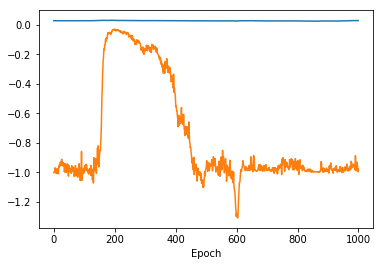

In [181]:
plt.figure()
# plt.plot(log_means)
plt.plot(close_prices)
plt.plot(actions-1)
plt.xlabel('Epoch')
plt.show()

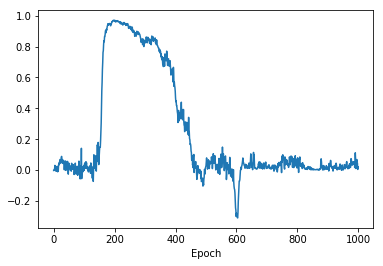

In [172]:
plt.figure()
plt.xlabel('Epoch')
plt.show()

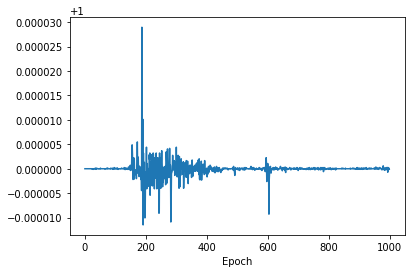

In [173]:
plt.figure()
plt.plot(log_frees)
plt.xlabel('Epoch')
plt.show()

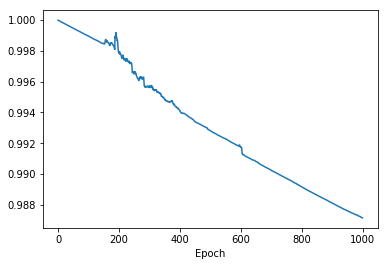

In [175]:
plt.figure()
plt.plot(p_values)
plt.xlabel('Epoch')
plt.show()

In [ ]:
def train():
    
        action = agent(
            batch.frame
        )
        
        # distribution of portfolio 
        # in next step
        future_omega = 0
        
        w_t = future_omega[:batch.size-1]
        w_t1 = action[1:batch.size]
        mu = 1 - (tf.reduce_sum(
            tf.abs(w_t1[:, 1:]-w_t[:, 1:]),
            axis=1
        )*batch.commission + batch.decay)
        
        
        free_rets = tf.reduce_sum(
            tf.concat(
                [
                    action*(batch.next_prices-batch.current_prices),
                    tf.ones([batch.size,1])
                ], 
                axis=1
            ), 
            axis=1
        )
        
        rets = free_rets * ( 
            tf.concat(
                [
                tf.ones(1),
                mu
                ],
                axis=0
            )
        )
        
        # Mean returns
        mean = tf.reduce_mean(rets)
        log_mean = tf.reduce_mean(tf.log(rets))
        log_mean_free = tf.reduce_mean(free_rets)
        
        # Standard Deviation of returns
        stdev = tf.sqrt(tf.reduce_mean(
           (rets - mean) ** 2
        ))
        
        # Sharpe ratio
        sharp_ratio = (mean - 1) / stdev
        
        # Portfolio value
        p_value = tf.reduce_prod(rets)
        
        loss = -tf.reduce_mean(tf.log(rets))
        
        tf.train.AdamOptimizer(learning_rate).minimize(
            loss, 
            global_step=self.__global_step
        )
        